# Lab 1. An Introduction to Pandas and Python

In [1]:
%matplotlib inline

import numpy as np
import scipy as sp
import matplotlib as mpl
import matplotlib.cm as cm # colormaps
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

pd.set_option('display.width', 500)
pd.set_option('display.max_columns', 100)
pd.set_option('display.notebook_repr_html', True)


#### markdown模式下把LaTeX代码放在两个美元符合之间`$LaTeX code in here$`可以表达数学公式
- `$$LaTeX code in here$$` 两个美元符号打头的生成的公式独占一行
- `$LaTeX code in here$`单个美元符号打头的生成的公式不换行

$$\alpha = \frac{\beta}{\gamma}$$

$\alpha = \frac{\beta}{\gamma}$
$\alpha = \frac{\beta}{\gamma}$


## Pandas

#### 如果csv文件没有表头，在不指明`header=None`的情况下，第一行的内容会变成表头；指明后，可以给`names`参数传递一个list来指定表头

In [2]:
df = pd.read_csv('all.csv', header=None, 
            names=['rating', 'review_count', 'isbn', 'booktype','author_url', 'year', 'genre_urls', 'dir','rating_count', 'name'])

In [3]:
df.head()

,rating,review_count,isbn,booktype,author_url,year,genre_urls,dir,rating_count,name
0,4.40,136455,0439023483,good_reads:book,https://www.goodreads.com/author/show/153394.S...,2008.0,/genres/young-adult|/genres/science-fiction|/g...,dir01/2767052-the-hunger-games.html,2958974,"The Hunger Games (The Hunger Games, #1)"
1,4.41,16648,0439358078,good_reads:book,https://www.goodreads.com/author/show/1077326....,2003.0,/genres/fantasy|/genres/young-adult|/genres/fi...,dir01/2.Harry_Potter_and_the_Order_of_the_Phoe...,1284478,Harry Potter and the Order of the Phoenix (Har...
2,3.56,85746,0316015849,good_reads:book,https://www.goodreads.com/author/show/941441.S...,2005.0,/genres/young-adult|/genres/fantasy|/genres/ro...,dir01/41865.Twilight.html,2579564,"Twilight (Twilight, #1)"
3,4.23,47906,0061120081,good_reads:book,https://www.goodreads.com/author/show/1825.Har...,1960.0,/genres/classics|/genres/fiction|/genres/histo...,dir01/2657.To_Kill_a_Mockingbird.html,2078123,To Kill a Mockingbird
4,4.23,34772,0679783261,good_reads:book,https://www.goodreads.com/author/show/1265.Jan...,1813.0,/genres/classics|/genres/fiction|/genres/roman...,dir01/1885.Pride_and_Prejudice.html,1388992,Pride and Prejudice


#### 显示df每一列对应的类型

In [4]:
df.dtypes

rating          float64
review_count     object
isbn             object
booktype         object
author_url       object
year            float64
genre_urls       object
dir              object
rating_count     object
name             object
dtype: object

#### 也可以单独显示一列的类型

In [5]:
df['rating'].dtypes

dtype('float64')

#### 显示df的形状，表面有6000行和10列组成

In [6]:
df.shape

(6000, 10)

In [7]:
df.shape[0], df.shape[1]

(6000, 10)

#### 显示每列columns对应的名称

In [8]:
df.columns

Index(['rating', 'review_count', 'isbn', 'booktype', 'author_url', 'year', 'genre_urls', 'dir', 'rating_count', 'name'], dtype='object')

In [9]:
df.index

RangeIndex(start=0, stop=6000, step=1)

#### df是DataFrame对象，df对应的每列column是Series对象

In [10]:
type(df), type(df['rating'])

(pandas.core.frame.DataFrame, pandas.core.series.Series)

#### 选定某一列，然后和数字比较大小，可以得到一个由bool值组成的Series（通常称为mask）

In [11]:
df['rating'] < 3

0       False
1       False
2       False
3       False
4       False
5       False
6       False
7       False
8       False
9       False
10      False
11      False
12      False
13      False
14      False
15      False
16      False
17      False
18      False
19      False
20      False
21      False
22      False
23      False
24      False
25      False
26      False
27      False
28      False
29      False
        ...  
5970    False
5971    False
5972    False
5973    False
5974    False
5975    False
5976    False
5977    False
5978    False
5979     True
5980    False
5981    False
5982    False
5983    False
5984    False
5985    False
5986    False
5987    False
5988    False
5989    False
5990    False
5991    False
5992    False
5993    False
5994    False
5995    False
5996    False
5997    False
5998    False
5999    False
Name: rating, dtype: bool

In [12]:
type(df['rating'] < 3)

pandas.core.series.Series

#### 通过mask过滤数据，只保留rating小于3的子集

In [13]:
df[df['rating'] < 3]

,rating,review_count,isbn,booktype,author_url,year,genre_urls,dir,rating_count,name
2609,2.90,8,NaN,good_reads:book,https://www.goodreads.com/author/show/7707820....,2013.0,/genres/romance|/genres/realistic-fiction|/gen...,dir27/19546932-how-to-be-a-perfect-girl.html,31,How To Be A Perfect Girl
3738,2.00,368,0983650322,good_reads:book,https://www.goodreads.com/author/show/9414.Vic...,2011.0,/genres/young-adult|/genres/science-fiction|/g...,dir38/12393909-revealing-eden.html,688,"Revealing Eden (Save the Pearls, #1)"
5844,2.97,1399,0395083621,good_reads:book,https://www.goodreads.com/author/show/30691.Ad...,1925.0,/genres/history|/genres/non-fiction|/genres/bi...,dir59/54270.Mein_Kampf.html,12417,Mein Kampf
5979,2.77,800,0060988649,good_reads:book,https://www.goodreads.com/author/show/7025.Gre...,2001.0,/genres/fantasy|/genres/fiction|/genres/myster...,dir60/24929.Lost.html,11128,Lost


In [14]:
np.sum(df['rating']< 3)

4

In [15]:
np.sum(df['rating'] < 3) / df.shape[0]

0.00066666666666666664

In [16]:
np.mean(df['rating'] < 3)

0.00066666666666666664

In [17]:
(df['rating'] < 3).mean()

0.00066666666666666664

#### 两种方法过滤数据
- df.query('column_name' > xx)
- df[df['column_name'] > xx]

In [18]:
df[df['rating'] > 4.5]

,rating,review_count,isbn,booktype,author_url,year,genre_urls,dir,rating_count,name
17,4.58,1314,0345538374,good_reads:book,https://www.goodreads.com/author/show/656983.J...,1973.0,/genres/fantasy|/genres/classics|/genres/scien...,dir01/30.J_R_R_Tolkien_4_Book_Boxed_Set.html,68495,J.R.R. Tolkien 4-Book Boxed Set
162,4.55,15777,075640407X,good_reads:book,https://www.goodreads.com/author/show/108424.P...,2007.0,/genres/fantasy|/genres/fiction,dir02/186074.The_Name_of_the_Wind.html,210018,The Name of the Wind (The Kingkiller Chronicle...
222,4.53,15256,055357342X,good_reads:book,https://www.goodreads.com/author/show/346732.G...,2000.0,/genres/fantasy|/genres/fiction|/genres/fantas...,dir03/62291.A_Storm_of_Swords.html,327992,"A Storm of Swords (A Song of Ice and Fire, #3)"
242,4.53,5404,0545265355,good_reads:book,https://www.goodreads.com/author/show/153394.S...,2010.0,/genres/young-adult|/genres/fiction|/genres/fa...,dir03/7938275-the-hunger-games-trilogy-boxset....,102330,The Hunger Games Trilogy Boxset (The Hunger Ga...
249,4.80,644,0740748475,good_reads:book,https://www.goodreads.com/author/show/13778.Bi...,2005.0,/genres/sequential-art|/genres/comics|/genres/...,dir03/24812.The_Complete_Calvin_and_Hobbes.html,22674,The Complete Calvin and Hobbes
284,4.58,15195,1406321346,good_reads:book,https://www.goodreads.com/author/show/150038.C...,2013.0,/genres/fantasy|/genres/young-adult|/genres/fa...,dir03/18335634-clockwork-princess.html,130161,"Clockwork Princess (The Infernal Devices, #3)"
304,4.54,572,0140259449,good_reads:book,https://www.goodreads.com/author/show/1265.Jan...,1933.0,/genres/classics|/genres/fiction|/genres/roman...,dir04/14905.The_Complete_Novels.html,17539,The Complete Novels
386,4.55,8820,0756404738,good_reads:book,https://www.goodreads.com/author/show/108424.P...,2011.0,/genres/fantasy|/genres/fantasy|/genres/epic-f...,dir04/1215032.The_Wise_Man_s_Fear.html,142499,"The Wise Man's Fear (The Kingkiller Chronicle,..."
400,4.53,9292,1423140605,good_reads:book,https://www.goodreads.com/author/show/15872.Ri...,2012.0,/genres/fantasy|/genres/young-adult|/genres/fa...,dir05/12127750-the-mark-of-athena.html,128412,"The Mark of Athena (The Heroes of Olympus, #3)"
475,4.57,824,1416997857,good_reads:book,https://www.goodreads.com/author/show/150038.C...,2009.0,/genres/fantasy|/genres/young-adult|/genres/fa...,dir05/6485421-the-mortal-instruments-boxed-set...,39720,The Mortal Instruments Boxed Set (The Mortal I...


In [19]:
df.query('rating > 4.5')

,rating,review_count,isbn,booktype,author_url,year,genre_urls,dir,rating_count,name
17,4.58,1314,0345538374,good_reads:book,https://www.goodreads.com/author/show/656983.J...,1973.0,/genres/fantasy|/genres/classics|/genres/scien...,dir01/30.J_R_R_Tolkien_4_Book_Boxed_Set.html,68495,J.R.R. Tolkien 4-Book Boxed Set
162,4.55,15777,075640407X,good_reads:book,https://www.goodreads.com/author/show/108424.P...,2007.0,/genres/fantasy|/genres/fiction,dir02/186074.The_Name_of_the_Wind.html,210018,The Name of the Wind (The Kingkiller Chronicle...
222,4.53,15256,055357342X,good_reads:book,https://www.goodreads.com/author/show/346732.G...,2000.0,/genres/fantasy|/genres/fiction|/genres/fantas...,dir03/62291.A_Storm_of_Swords.html,327992,"A Storm of Swords (A Song of Ice and Fire, #3)"
242,4.53,5404,0545265355,good_reads:book,https://www.goodreads.com/author/show/153394.S...,2010.0,/genres/young-adult|/genres/fiction|/genres/fa...,dir03/7938275-the-hunger-games-trilogy-boxset....,102330,The Hunger Games Trilogy Boxset (The Hunger Ga...
249,4.80,644,0740748475,good_reads:book,https://www.goodreads.com/author/show/13778.Bi...,2005.0,/genres/sequential-art|/genres/comics|/genres/...,dir03/24812.The_Complete_Calvin_and_Hobbes.html,22674,The Complete Calvin and Hobbes
284,4.58,15195,1406321346,good_reads:book,https://www.goodreads.com/author/show/150038.C...,2013.0,/genres/fantasy|/genres/young-adult|/genres/fa...,dir03/18335634-clockwork-princess.html,130161,"Clockwork Princess (The Infernal Devices, #3)"
304,4.54,572,0140259449,good_reads:book,https://www.goodreads.com/author/show/1265.Jan...,1933.0,/genres/classics|/genres/fiction|/genres/roman...,dir04/14905.The_Complete_Novels.html,17539,The Complete Novels
386,4.55,8820,0756404738,good_reads:book,https://www.goodreads.com/author/show/108424.P...,2011.0,/genres/fantasy|/genres/fantasy|/genres/epic-f...,dir04/1215032.The_Wise_Man_s_Fear.html,142499,"The Wise Man's Fear (The Kingkiller Chronicle,..."
400,4.53,9292,1423140605,good_reads:book,https://www.goodreads.com/author/show/15872.Ri...,2012.0,/genres/fantasy|/genres/young-adult|/genres/fa...,dir05/12127750-the-mark-of-athena.html,128412,"The Mark of Athena (The Heroes of Olympus, #3)"
475,4.57,824,1416997857,good_reads:book,https://www.goodreads.com/author/show/150038.C...,2009.0,/genres/fantasy|/genres/young-adult|/genres/fa...,dir05/6485421-the-mortal-instruments-boxed-set...,39720,The Mortal Instruments Boxed Set (The Mortal I...


In [20]:
df[df['year'] < 0]

,rating,review_count,isbn,booktype,author_url,year,genre_urls,dir,rating_count,name
47,3.68,5785,0143039954,good_reads:book,https://www.goodreads.com/author/show/903.Homer,-800.0,/genres/classics|/genres/fiction|/genres/poetr...,dir01/1381.The_Odyssey.html,560248,The Odyssey
246,4.01,365,0147712556,good_reads:book,https://www.goodreads.com/author/show/903.Homer,-800.0,/genres/classics|/genres/fantasy|/genres/mytho...,dir03/1375.The_Iliad_The_Odyssey.html,35123,The Iliad/The Odyssey
455,3.85,1499,0140449140,good_reads:book,https://www.goodreads.com/author/show/879.Plato,-380.0,/genres/philosophy|/genres/classics|/genres/no...,dir05/30289.The_Republic.html,82022,The Republic
596,3.77,1240,0679729526,good_reads:book,https://www.goodreads.com/author/show/919.Virgil,-29.0,/genres/classics|/genres/poetry|/genres/fictio...,dir06/12914.The_Aeneid.html,60308,The Aeneid
629,3.64,1231,1580495931,good_reads:book,https://www.goodreads.com/author/show/1002.Sop...,-429.0,/genres/classics|/genres/plays|/genres/drama|/...,dir07/1554.Oedipus_Rex.html,93192,Oedipus Rex
674,3.92,3559,1590302257,good_reads:book,https://www.goodreads.com/author/show/1771.Sun...,-512.0,/genres/non-fiction|/genres/politics|/genres/c...,dir07/10534.The_Art_of_War.html,114619,The Art of War
746,4.06,1087,0140449183,good_reads:book,https://www.goodreads.com/author/show/5158478....,-500.0,/genres/classics|/genres/spirituality|/genres/...,dir08/99944.The_Bhagavad_Gita.html,31634,The Bhagavad Gita
777,3.52,1038,1580493882,good_reads:book,https://www.goodreads.com/author/show/1002.Sop...,-442.0,/genres/drama|/genres/fiction|/genres/classics...,dir08/7728.Antigone.html,49084,Antigone
1233,3.94,704,015602764X,good_reads:book,https://www.goodreads.com/author/show/1002.Sop...,-400.0,/genres/classics|/genres/plays|/genres/drama|/...,dir13/1540.The_Oedipus_Cycle.html,36008,The Oedipus Cycle
1397,4.03,890,0192840509,good_reads:book,https://www.goodreads.com/author/show/12452.Aesop,-560.0,/genres/classics|/genres/childrens|/genres/lit...,dir14/21348.Aesop_s_Fables.html,71259,Aesop's Fables


#### 组合过滤，同时满足year小于0和rating大于4.1

In [21]:
df[(df['year'] < 0) & (df['rating'] > 4.1)]

,rating,review_count,isbn,booktype,author_url,year,genre_urls,dir,rating_count,name
3133,4.30,131,0872203492,good_reads:book,https://www.goodreads.com/author/show/879.Plato,-400.0,/genres/philosophy|/genres/classics|/genres/no...,dir32/9462.Complete_Works.html,7454,Complete Works
4475,4.11,281,0865163480,good_reads:book,https://www.goodreads.com/author/show/879.Plato,-390.0,/genres/philosophy|/genres/classics|/genres/no...,dir45/73945.Apology.html,11478,Apology


#### 筛选出year列值为NaN的子集

In [22]:
df[df['year'].isnull()]

,rating,review_count,isbn,booktype,author_url,year,genre_urls,dir,rating_count,name
2442,4.23,526,NaN,good_reads:book,https://www.goodreads.com/author/show/623606.A...,NaN,/genres/religion|/genres/islam|/genres/non-fic...,dir25/1301625.La_Tahzan.html,4134,La Tahzan
2869,4.61,2,NaN,good_reads:book,https://www.goodreads.com/author/show/8182217....,NaN,NaN,dir29/22031070-my-death-experiences---a-preach...,23,My Death Experiences - A Preacherâs 18 Apoca...
3643,NaN,None,None,None,None,NaN,NaN,dir37/9658936-harry-potter.html,None,None
5282,NaN,None,None,None,None,NaN,NaN,dir53/113138.The_Winner.html,None,None
5572,3.71,35,8423336603,good_reads:book,https://www.goodreads.com/author/show/285658.E...,NaN,/genres/fiction,dir56/890680._rase_una_vez_el_amor_pero_tuve_q...,403,Ãrase una vez el amor pero tuve que matarlo. ...
5658,4.32,44,NaN,good_reads:book,https://www.goodreads.com/author/show/25307.Ro...,NaN,/genres/fantasy|/genres/fantasy|/genres/epic-f...,dir57/5533041-assassin-s-apprentice-royal-assa...,3850,Assassin's Apprentice / Royal Assassin (Farsee...
5683,4.56,204,NaN,good_reads:book,https://www.goodreads.com/author/show/3097905....,NaN,/genres/fantasy|/genres/young-adult|/genres/ro...,dir57/12474623-tiger-s-dream.html,895,"Tiger's Dream (The Tiger Saga, #5)"


#### 清理数据，生成新的df，只保留year列值不是NaN的

In [23]:
df = df[df['year'].notnull()]

In [24]:
df.dtypes

rating          float64
review_count     object
isbn             object
booktype         object
author_url       object
year            float64
genre_urls       object
dir              object
rating_count     object
name             object
dtype: object

#### 将review_count和rating_count列的值的类型转换为int

In [25]:
df['review_count'] = df['review_count'].astype(int)
df['year'] = df['year'].astype(int)
df['rating_count'] = df['rating_count'].astype(int)

In [26]:
df.dtypes

rating          float64
review_count      int32
isbn             object
booktype         object
author_url       object
year              int32
genre_urls       object
dir              object
rating_count      int32
name             object
dtype: object

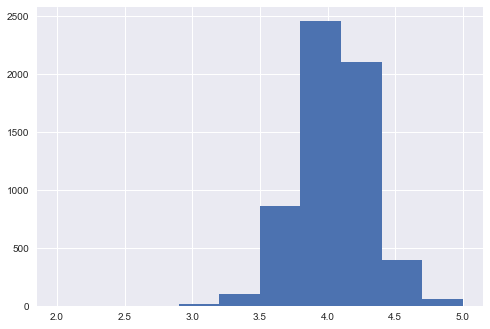

In [27]:
df['rating'].hist();

4.041997330218587 4.041997330218587 4.05


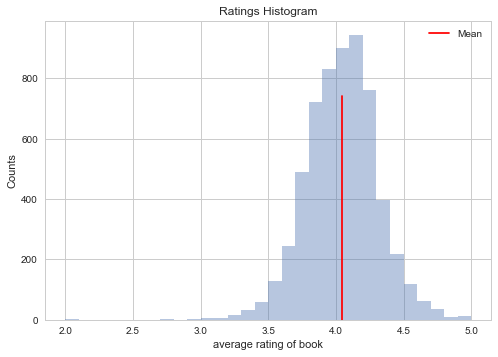

In [28]:
sns.set_context('notebook')
meanrat = df['rating'].mean()
print(meanrat, np.mean(df['rating']), df['rating'].median())

with sns.axes_style('whitegrid'):
    df['rating'].hist(bins=30, alpha=0.4)
    plt.axvline(meanrat, 0, 0.75, color='r', label='Mean')
    plt.xlabel('average rating of book')
    plt.ylabel('Counts')
    plt.title('Ratings Histogram')
    plt.legend() # 显示右上角的标注

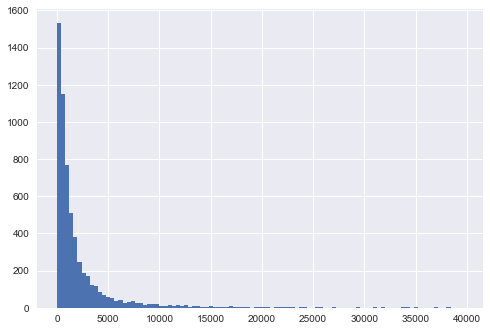

In [60]:
df['review_count'].hist(bins=np.arange(0, 40000, 400));

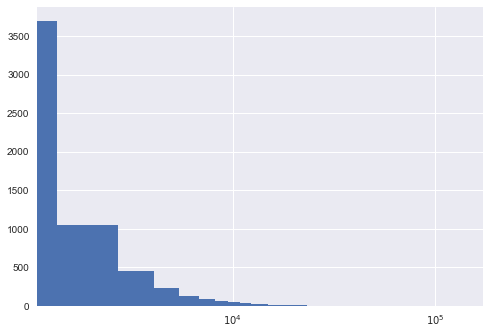

In [30]:
df['review_count'].hist(bins=100)
plt.xscale('log')

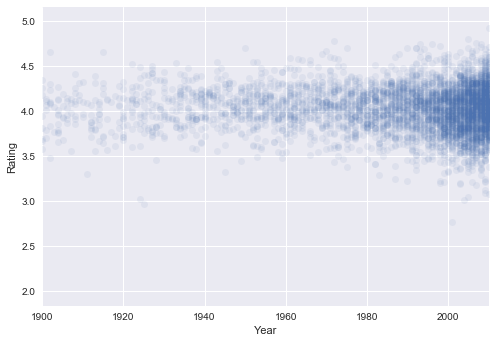

In [61]:
plt.scatter(df['year'], df['rating'], lw=0, alpha=.08)
plt.xlim([1900, 2010])
plt.xlabel('Year')
plt.ylabel('Rating');

In [32]:
alist = [1,2,3,4,5]

In [33]:
asquaredlist = [i**2 for i in alist]
asquaredlist

[1, 4, 9, 16, 25]

#### 绘制散点图

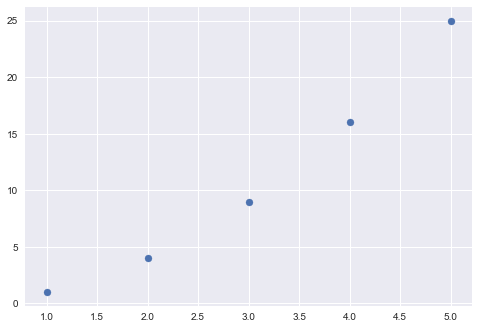

In [62]:
plt.scatter(alist, asquaredlist);

In [35]:
type(alist)

list

#### 绘制直方图

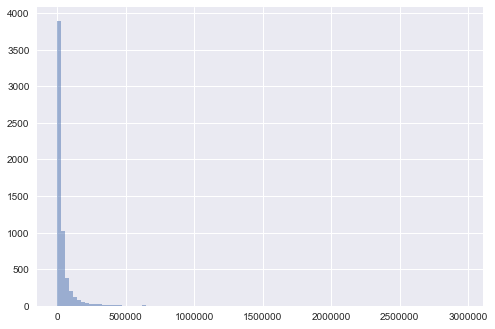

In [63]:
plt.hist(df['rating_count'].values, bins=100, alpha=0.5);

In [37]:
print(type(df['rating_count']), type(df['rating_count'].values))

<class 'pandas.core.series.Series'> <class 'numpy.ndarray'>


#### 矢量化
- 两个python的list相加是把后者加到前者的末尾
- numpy的array是进行矢量化相加，也就是所谓的广播机制

In [38]:
alist + alist

[1, 2, 3, 4, 5, 1, 2, 3, 4, 5]

In [39]:
np.array(alist) + np.array(alist)

array([ 2,  4,  6,  8, 10])

In [40]:
np.array(alist)**2

array([ 1,  4,  9, 16, 25])

In [42]:
a = np.array(alist)
b = np.array(alist)
a * b

array([ 1,  4,  9, 16, 25])

In [43]:
a + 1

array([2, 3, 4, 5, 6])

#### python的list实现直接相加

In [41]:
new_list = []
for i in alist:
    new_list.append(i + i)
new_list

[2, 4, 6, 8, 10]

In [64]:
[i+i for i in alist]

[2, 4, 6, 8, 10]

## Python and Friends

In [65]:
1+2

3

In [67]:
1/2, 1.0/2.0, 3*3.2 # python2的话第一个会显示0,python3里的用1//2实现

(0.5, 0.5, 9.600000000000001)

In [68]:
1//2

0

In [81]:
print(1+3.0, 5/3.0)
5//3

4.0 1.6666666666666667


1

In [76]:
a = 5.0/6.0
print(a)
print( type(a))

0.8333333333333334
<class 'float'>


In [82]:
import types
type(a) == float

True

In [83]:
type(a) == int

False

#### 列表表达式

In [85]:
alist = [1,2,3,4,5]
asquaredlist = [i*i for i in alist]
asquaredlist

[1, 4, 9, 16, 25]

#### enumerate和zip

In [86]:
enumerate(asquaredlist), zip(alist, asquaredlist)

(<enumerate at 0xaa4f9d8>, <zip at 0xa9e1b48>)

#### enumerate(list)返回[(index,value), ...(index, value)]

In [87]:
[k for k in enumerate(asquaredlist)]

[(0, 1), (1, 4), (2, 9), (3, 16), (4, 25)]

#### zip(list1, list2)将两个list里对应的元素组合成tuple并返回list

In [141]:
[i for i in zip(alist, asquaredlist)]

[(1, 1), (2, 4), (3, 9), (4, 16), (5, 25)]

In [88]:
linelengths = [len(line) for line in open('hamlet.txt')]
print(linelengths)

[6, 26, 1, 23, 1, 1, 1, 1, 21, 1, 27, 59, 28, 27, 26, 21, 21, 23, 24, 17, 23, 10, 20, 19, 21, 31, 9, 27, 30, 11, 21, 26, 1, 50, 31, 1, 66, 12, 1, 17, 1, 1, 1, 7, 1, 49, 1, 48, 1, 5, 13, 1, 6, 44, 1, 5, 20, 1, 6, 10, 1, 5, 4, 1, 6, 40, 1, 5, 52, 1, 6, 47, 24, 1, 5, 26, 1, 6, 22, 1, 5, 18, 38, 45, 1, 6, 47, 1, 31, 1, 5, 24, 1, 5, 26, 1, 6, 21, 1, 5, 29, 23, 1, 6, 23, 21, 1, 8, 1, 5, 17, 1, 5, 5, 24, 1, 5, 16, 1, 5, 44, 1, 5, 46, 1, 5, 21, 1, 5, 35, 41, 47, 37, 44, 36, 41, 1, 5, 31, 1, 5, 17, 40, 41, 30, 1, 5, 19, 40, 1, 5, 19, 50, 50, 42, 29, 1, 5, 50, 1, 22, 1, 5, 47, 1, 5, 42, 1, 5, 46, 1, 5, 48, 1, 5, 22, 1, 5, 22, 1, 5, 49, 41, 39, 53, 1, 5, 16, 1, 5, 21, 1, 5, 41, 1, 14, 1, 5, 32, 1, 5, 45, 41, 21, 1, 5, 40, 37, 18, 1, 5, 25, 1, 5, 24, 35, 39, 44, 41, 14, 1, 5, 47, 46, 1, 5, 47, 43, 47, 1, 5, 48, 46, 42, 42, 40, 49, 42, 45, 49, 29, 1, 5, 12, 46, 41, 43, 44, 52, 52, 52, 35, 49, 44, 38, 42, 34, 49, 38, 48, 35, 46, 40, 38, 47, 41, 38, 45, 44, 40, 49, 43, 1, 5, 36, 46, 48, 44, 1, 5, 40,

In [89]:
sum(linelengths), np.mean(linelengths), np.median(linelengths), np.std(linelengths)

(173946, 25.69364844903988, 25.0, 21.030134624309685)

#### 统计字数

In [92]:
with open('hamlet.txt', encoding='utf-8') as f:
    hamlet = f.read()
    words = hamlet.split()
    print(len(words))

31659


#### 打印前1000个字

In [93]:
print(hamlet[:1000])

﻿XXXX
HAMLET, PRINCE OF DENMARK

by William Shakespeare




PERSONS REPRESENTED.

Claudius, King of Denmark.
Hamlet, Son to the former, and Nephew to the present King.
Polonius, Lord Chamberlain.
Horatio, Friend to Hamlet.
Laertes, Son to Polonius.
Voltimand, Courtier.
Cornelius, Courtier.
Rosencrantz, Courtier.
Guildenstern, Courtier.
Osric, Courtier.
A Gentleman, Courtier.
A Priest.
Marcellus, Officer.
Bernardo, Officer.
Francisco, a Soldier
Reynaldo, Servant to Polonius.
Players.
Two Clowns, Grave-diggers.
Fortinbras, Prince of Norway.
A Captain.
English Ambassadors.
Ghost of Hamlet's Father.

Gertrude, Queen of Denmark, and Mother of Hamlet.
Ophelia, Daughter to Polonius.

Lords, Ladies, Officers, Soldiers, Sailors, Messengers, and other
Attendants.

SCENE. Elsinore.



ACT I.

Scene I. Elsinore. A platform before the Castle.

[Francisco at his post. Enter to him Bernardo.]

Ber.
Who's there?

Fran.
Nay, answer me: stand, and unfold yourself.

Ber.
Long live the king!

Fran.
Bernar

#### 打印后1000个字

In [94]:
print(hamlet[-1000:])

on by cunning and forc'd cause;
And, in this upshot, purposes mistook
Fall'n on the inventors' heads: all this can I
Truly deliver.

Fort.
Let us haste to hear it,
And call the noblest to the audience.
For me, with sorrow I embrace my fortune:
I have some rights of memory in this kingdom,
Which now, to claim my vantage doth invite me.

Hor.
Of that I shall have also cause to speak,
And from his mouth whose voice will draw on more:
But let this same be presently perform'd,
Even while men's minds are wild: lest more mischance
On plots and errors happen.

Fort.
Let four captains
Bear Hamlet like a soldier to the stage;
For he was likely, had he been put on,
To have prov'd most royally: and, for his passage,
The soldiers' music and the rites of war
Speak loudly for him.--
Take up the bodies.--Such a sight as this
Becomes the field, but here shows much amiss.
Go, bid the soldiers shoot.

[A dead march.]

[Exeunt, bearing off the dead bodies; after the which a peal of
ordnance is shot off.]


#### 选取words里第2、3、4三个元素

In [95]:
print(words[1:4])

['HAMLET,', 'PRINCE', 'OF']


#### 选取words里前4个元素

In [96]:
print(words[:4])

['\ufeffXXXX', 'HAMLET,', 'PRINCE', 'OF']


#### 选取第一个元素

In [97]:
print(words[0])

﻿XXXX


#### 选取最后一个元素

In [98]:
print(words[-1])

off.]


#### 从区间[1,8]每隔2个元素选取

In [99]:
print(words[1:8:2])

['HAMLET,', 'OF', 'by', 'Shakespeare']


mylist = []
for i in range(10):
    mylist.append(i)
mylist

#### 字典(Dictionaries)

In [103]:
adict={'one':1, 'two':2, 'three':3}
print([i for i in adict])
print([(k,v) for k,v in adict.items()])
print(adict.values())

['one', 'two', 'three']
[('one', 1), ('two', 2), ('three', 3)]
dict_values([1, 2, 3])


#### 字典表达式

In [105]:
mydict = {k:v for k,v in zip(alist, asquaredlist)}
mydict

{1: 1, 2: 4, 3: 9, 4: 16, 5: 25}

#### 利用dict()对象构造字典

In [108]:
dict(a=1,b=2)

{'a': 1, 'b': 2}

#### 转换json格式

In [114]:
import json
# 字典 to JSON
s = json.dumps(mydict)
print(s, type(s))

{"1": 1, "2": 4, "3": 9, "4": 16, "5": 25} <class 'str'>


In [115]:
# JSON to 字典
print(json.loads(s), type(json.loads(s)))

{'1': 1, '2': 4, '3': 9, '4': 16, '5': 25} <class 'dict'>


#### 字符串(Strings)

In [117]:
lastword = words[-1]
print(lastword)

off.]


In [118]:
lastword[-2]

'.'

In [119]:
# 字符串无法更改
lastword[-2] = 'k'

TypeError: 'str' object does not support item assignment

#### 函数(Functions)

In [120]:
def square(x):
    return x*x

def cube(x):
    return x*x*x
square(5), cube(5)

(25, 125)

In [121]:
print(square, type(cube))

<function square at 0x000000000AA110D0> <class 'function'>


#### 可以将函数作为参数传递给函数

In [122]:
def sum_of_anything(x,y,f):
    print(x,y,f)
    return f(x) + f(y)
sum_of_anything(3,4,square)

3 4 <function square at 0x000000000AA110D0>


25

#### 函数可以有位置参数和关键字参数

In [128]:
def f(a,b,*posargs,**dictargs):
    print('got',a,b,posargs,dictargs)
    return a
print(f(1,3))
print(f(1,3,4,d=1,c=2))

got 1 3 () {}
1
got 1 3 (4,) {'d': 1, 'c': 2}
1


####  create a dictionary with keys the integers upto and including 10, and values the cubes of these dictionaries

In [143]:
{i:i**3 for i in range(0, 11)}

{0: 0,
 1: 1,
 2: 8,
 3: 27,
 4: 64,
 5: 125,
 6: 216,
 7: 343,
 8: 512,
 9: 729,
 10: 1000}

In [129]:
lst = range(11)
{k:cube(v) for k,v in enumerate(lst)}

{0: 0,
 1: 1,
 2: 8,
 3: 27,
 4: 64,
 5: 125,
 6: 216,
 7: 343,
 8: 512,
 9: 729,
 10: 1000}

#### 布尔值和控制流

In [130]:
a =  [1,2,3,4,5]
1 in a

True

In [131]:
6 in a

False

#### python支持if/elif/else多条件从句

In [132]:
def do_it(x):
    if x==1:
        print('one')
    elif x==2:
        print('two')
    else:
        print(x)
do_it(1), do_it(2), do_it(3)

one
two
3


(None, None, None)

#### break和continue
- break，结束整个循环
- continue，跳过当前循环，继续下一轮

In [135]:
for i in range(10):
    if i == 5:
        break # 当i等于5时，结束了整个循环
    print(i)

0
1
2
3
4


In [137]:
for i in range(10):
    if i == 5:
        continue # 当i等于5时，跳过当前循环继续下一轮循环
    print(i)

0
1
2
3
4
6
7
8
9


#### 例外(Exceptions)
捕捉错误

In [139]:
try:
    f(1) # 接收至少2个参数
except:
    import sys
    print(sys.exc_info())

(<class 'TypeError'>, TypeError("f() missing 1 required positional argument: 'b'",), <traceback object at 0x000000000A90EE08>)


#### 整合运用

In [140]:
# 统计一共有多少个小写的'thou'
hamlettokens = [word.lower() for word in words]
hamlettokens.count('thou')

95

#### 使用频率最高的100个词

In [144]:
with open('hamlet.txt', encoding='utf-8') as f:
    text = f.read()
    words = text.split()
    words = [word.lower() for word in words]
# 统计词频    
dicts = {}
unique = set(words)
for word in unique:
    dicts[word] = words.count(word)
# for word in words:
#     if word not in dicts:
#         dicts[word] = 0
#     dicts[word] += 1
# 将字典对调key和value然后转化为tuple对的list
frequency = [(v, k) for k,v in dicts.items()]
frequency.sort(reverse=True) # 降序排列
frequency[:10]

[(1136, 'the'),
 (943, 'and'),
 (720, 'to'),
 (667, 'of'),
 (527, 'a'),
 (512, 'my'),
 (510, 'i'),
 (420, 'in'),
 (412, 'you'),
 (358, 'ham.')]

In [145]:
sorted(dicts.items(), key=lambda d: d[1], reverse=True)

[('the', 1136),
 ('and', 943),
 ('to', 720),
 ('of', 667),
 ('a', 527),
 ('my', 512),
 ('i', 510),
 ('in', 420),
 ('you', 412),
 ('ham.', 358),
 ('that', 337),
 ('it', 324),
 ('is', 320),
 ('his', 295),
 ('not', 270),
 ('with', 264),
 ('this', 250),
 ('your', 241),
 ('for', 231),
 ('but', 228),
 ('as', 216),
 ('he', 202),
 ('be', 201),
 ('what', 183),
 ('have', 174),
 ('will', 149),
 ('so', 143),
 ('me', 142),
 ('we', 132),
 ('do', 128),
 ('are', 126),
 ('him', 122),
 ('our', 119),
 ('king.', 113),
 ('by', 111),
 ('hor.', 110),
 ('if', 109),
 ('on', 109),
 ('or', 109),
 ('no', 107),
 ('shall', 106),
 ('from', 95),
 ('all', 95),
 ('thou', 95),
 ('they', 93),
 ('let', 92),
 ('good', 88),
 ('thy', 86),
 ('pol.', 86),
 ('at', 86),
 ('how', 84),
 ('most', 82),
 ('lord,', 81),
 ('more', 76),
 ('queen.', 76),
 ('her', 76),
 ('like', 75),
 ('would', 74),
 ('was', 73),
 ("'tis", 70),
 ('you,', 66),
 ('may', 65),
 ('very', 64),
 ('laer.', 62),
 ('hath', 62),
 ('[enter', 61),
 ('lord.', 60),
 ('d

#### 绘制使用频率最高的20个词的条形图

[(1136, 'the'), (943, 'and'), (720, 'to'), (667, 'of'), (527, 'a'), (512, 'my'), (510, 'i'), (420, 'in'), (412, 'you'), (358, 'ham.'), (337, 'that'), (324, 'it'), (320, 'is'), (295, 'his'), (270, 'not'), (264, 'with'), (250, 'this'), (241, 'your'), (231, 'for'), (228, 'but')]


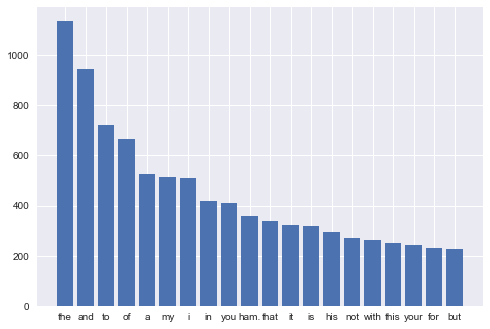

In [151]:
top20 = frequency[:20]
print(top20)
pos = np.arange(len(top20))
plt.bar(pos, [e[0] for e in top20])
plt.xticks(pos, [e[1] for e in top20]);